# Basic network import and representation

Based on nb02_data_import_and_networks.ipynb

but I look at the college-message SNAP repository

This contains 3-tuples with a time dimension, that I will flatten

We analyze the dataset 'CollegeMsg' available from the SNAP repository: http://snap.stanford.edu/data/index.html

Downloaded from here: https://snap.stanford.edu/data/CollegeMsg.html


In [6]:
import sys, math

In [7]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
import collections as col

We use a dictionary that associates a key (node) to a list of nodes (neighbours)

In [9]:
links_out = col.defaultdict(list)
print(links_out)

defaultdict(<class 'list'>, {})


We open the file containing the network and read each line

In [10]:
filepath = "CollegeMsg.txt"

In [11]:
fh = open(filepath, "r")

In [12]:
fh

<_io.TextIOWrapper name='CollegeMsg.txt' mode='r' encoding='cp1252'>

In [13]:
s = fh.readlines()

In [15]:
s

['1 2 1082040961\n',
 '3 4 1082155839\n',
 '5 2 1082414391\n',
 '6 7 1082439619\n',
 '8 7 1082439756\n',
 '9 10 1082440403\n',
 '9 11 1082440453\n',
 '12 13 1082441188\n',
 '9 14 1082441754\n',
 '9 15 1082441824\n',
 '9 16 1082441895\n',
 '9 17 1082442153\n',
 '9 14 1082442328\n',
 '9 18 1082442560\n',
 '19 18 1082443023\n',
 '20 21 1082444944\n',
 '19 22 1082450074\n',
 '8 23 1082450243\n',
 '9 24 1082450645\n',
 '9 22 1082450656\n',
 '25 21 1082467089\n',
 '26 7 1082481125\n',
 '27 28 1082490240\n',
 '29 25 1082504083\n',
 '30 31 1082517506\n',
 '30 31 1082517511\n',
 '30 31 1082517513\n',
 '30 31 1082517516\n',
 '32 33 1082518023\n',
 '34 35 1082525530\n',
 '34 33 1082525718\n',
 '36 37 1082530949\n',
 '38 39 1082538849\n',
 '36 40 1082539557\n',
 '41 15 1082540305\n',
 '41 11 1082540354\n',
 '41 14 1082540462\n',
 '41 13 1082540496\n',
 '41 39 1082541442\n',
 '41 42 1082574211\n',
 '41 43 1082576344\n',
 '9 40 1082583700\n',
 '44 45 1082585468\n',
 '46 22 1082587705\n',
 '44 46 108

In [16]:
s[:4]

['1 2 1082040961\n',
 '3 4 1082155839\n',
 '5 2 1082414391\n',
 '6 7 1082439619\n']

In [17]:
s[10].strip().split()

['9', '16', '1082441895']

In [18]:
for line in s:
    # remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    t = line.strip().split()
    if t[0] != "#":
        # the first lines are comments
        origin = int(t[0])
        dest = int(t[1])
        links_out[origin].append(dest)

# close the file
fh.close()

In [19]:
len(links_out[1001])

3

How many nodes are in the network?

In [20]:
tot_nodes = len(links_out)
print(tot_nodes)

1350


We calculate the out-degree distribution of the network.

In [21]:
degree_out = {}

for i in links_out:

    deg_out = len(links_out[i])

    if deg_out in degree_out:
        degree_out[deg_out] += 1
    else:
        degree_out[deg_out] = 1

In [22]:
print(sorted(degree_out.keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 120, 122, 125, 126, 127, 128, 129, 130, 137, 138, 139, 140, 141, 142, 143, 145, 149, 153, 154, 156, 157, 158, 160, 161, 162, 164, 165, 167, 168, 169, 170, 174, 178, 181, 183, 184, 185, 186, 187, 192, 193, 194, 196, 199, 200, 203, 205, 209, 210, 212, 213, 215, 219, 222, 227, 229, 233, 235, 241, 247, 250, 263, 266, 267, 273, 275, 280, 283, 295, 299, 302, 305, 312, 315, 319, 322, 325, 346, 354, 359, 375, 388, 391, 394, 397, 405, 443, 446, 449, 457, 485, 493, 561, 640, 686, 739, 993, 1012, 1091]


In [24]:
degree_out

{203: 1,
 354: 1,
 1: 174,
 116: 2,
 59: 2,
 1091: 1,
 993: 1,
 359: 2,
 5: 49,
 53: 7,
 273: 1,
 27: 11,
 36: 6,
 457: 2,
 86: 2,
 267: 1,
 322: 1,
 561: 1,
 167: 2,
 7: 40,
 183: 1,
 170: 1,
 14: 17,
 126: 2,
 88: 4,
 141: 1,
 58: 4,
 26: 9,
 3: 76,
 229: 2,
 96: 4,
 13: 23,
 15: 23,
 219: 1,
 6: 34,
 8: 26,
 33: 13,
 165: 1,
 4: 57,
 69: 1,
 739: 1,
 686: 1,
 60: 9,
 31: 8,
 32: 8,
 16: 19,
 78: 7,
 85: 2,
 2: 99,
 21: 16,
 64: 2,
 119: 2,
 209: 1,
 275: 1,
 79: 3,
 22: 14,
 80: 5,
 375: 1,
 19: 16,
 17: 28,
 43: 6,
 24: 11,
 142: 1,
 102: 2,
 200: 1,
 11: 23,
 299: 1,
 302: 1,
 120: 2,
 35: 8,
 61: 2,
 312: 1,
 138: 2,
 20: 18,
 18: 15,
 34: 9,
 84: 5,
 493: 1,
 213: 1,
 23: 11,
 75: 1,
 153: 2,
 67: 3,
 212: 3,
 449: 1,
 10: 29,
 39: 13,
 325: 2,
 91: 3,
 37: 5,
 54: 2,
 63: 2,
 41: 9,
 50: 4,
 193: 1,
 71: 5,
 266: 1,
 66: 4,
 184: 2,
 72: 3,
 280: 1,
 29: 13,
 1012: 1,
 48: 4,
 118: 3,
 82: 2,
 94: 4,
 42: 8,
 295: 1,
 77: 4,
 107: 4,
 30: 9,
 95: 3,
 485: 1,
 65: 3,
 122: 2,
 1

We export the degree distribution to an output file.

In [25]:
s_deg = sorted(degree_out.keys())

In [26]:
fout = open("CollegeMsg-degout-distri.txt", "w")
for d in s_deg:
    deg_freq = float(degree_out[d]) / tot_nodes

    fout.write(str(d) + "  " + str(deg_freq) + "\n")

fout.close()

In [27]:
for i in degree_out.items():
    print(i)

(203, 1)
(354, 1)
(1, 174)
(116, 2)
(59, 2)
(1091, 1)
(993, 1)
(359, 2)
(5, 49)
(53, 7)
(273, 1)
(27, 11)
(36, 6)
(457, 2)
(86, 2)
(267, 1)
(322, 1)
(561, 1)
(167, 2)
(7, 40)
(183, 1)
(170, 1)
(14, 17)
(126, 2)
(88, 4)
(141, 1)
(58, 4)
(26, 9)
(3, 76)
(229, 2)
(96, 4)
(13, 23)
(15, 23)
(219, 1)
(6, 34)
(8, 26)
(33, 13)
(165, 1)
(4, 57)
(69, 1)
(739, 1)
(686, 1)
(60, 9)
(31, 8)
(32, 8)
(16, 19)
(78, 7)
(85, 2)
(2, 99)
(21, 16)
(64, 2)
(119, 2)
(209, 1)
(275, 1)
(79, 3)
(22, 14)
(80, 5)
(375, 1)
(19, 16)
(17, 28)
(43, 6)
(24, 11)
(142, 1)
(102, 2)
(200, 1)
(11, 23)
(299, 1)
(302, 1)
(120, 2)
(35, 8)
(61, 2)
(312, 1)
(138, 2)
(20, 18)
(18, 15)
(34, 9)
(84, 5)
(493, 1)
(213, 1)
(23, 11)
(75, 1)
(153, 2)
(67, 3)
(212, 3)
(449, 1)
(10, 29)
(39, 13)
(325, 2)
(91, 3)
(37, 5)
(54, 2)
(63, 2)
(41, 9)
(50, 4)
(193, 1)
(71, 5)
(266, 1)
(66, 4)
(184, 2)
(72, 3)
(280, 1)
(29, 13)
(1012, 1)
(48, 4)
(118, 3)
(82, 2)
(94, 4)
(42, 8)
(295, 1)
(77, 4)
(107, 4)
(30, 9)
(95, 3)
(485, 1)
(65, 3)
(122, 2)
(1

In [28]:
from operator import itemgetter

In [29]:
x = []
y = []

for i in sorted(degree_out.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1]) / tot_nodes)

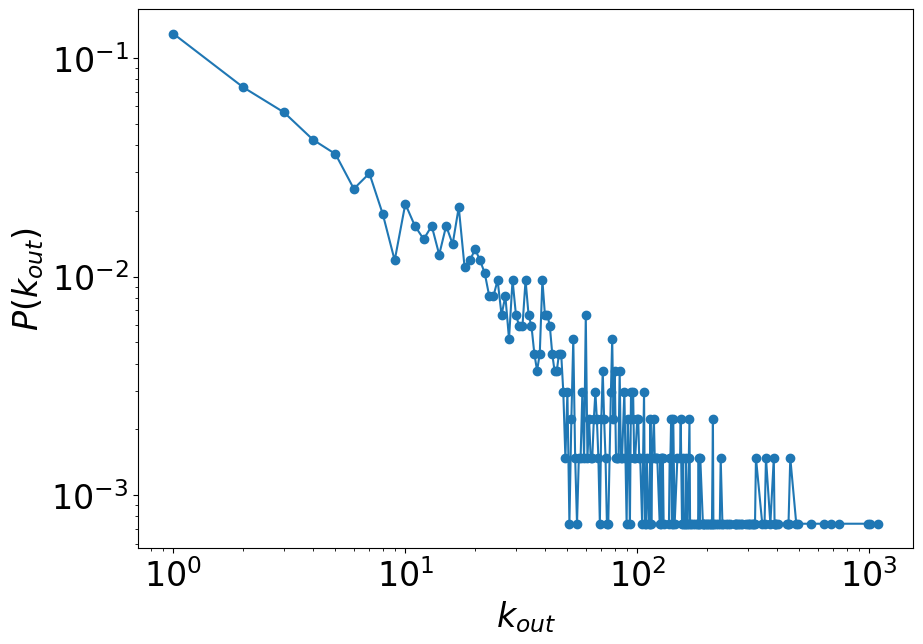

In [30]:
plt.figure(figsize=(10, 7))

plt.plot(x, y, "o-")

plt.xlabel("$k_{out}$", fontsize=24)
plt.ylabel("$P(k_{out})$", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale("log")
plt.xscale("log")

Let's have a look at the degree-in distribution.

In [31]:
links_in = col.defaultdict(list)

fh = open(filepath, "r")
# reading all the file lines
for line in fh.readlines():
    # remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s = line.strip().split()
    if s[0] != "#":
        # the first lines are comments
        origin = int(s[0])
        dest = int(s[1])
        links_in[dest].append(origin)

# chiudo il file
fh.close()

In [32]:
degree_in = col.defaultdict(int)
for i in links_in.keys():
    deg = len(links_in[i])
    degree_in[deg] += 1

tot_nodes_in = len(links_in)
print(tot_nodes_in)

1862


What is the difference from an exponential distribution?

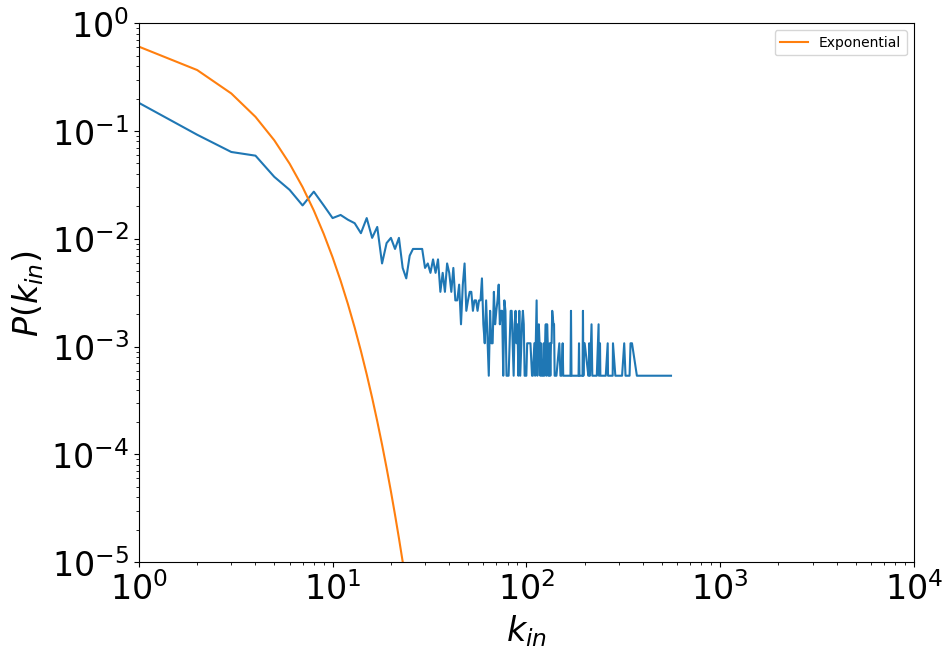

In [34]:
def f(t):
    return np.exp(-0.5 * t)


x = []
y = []
for i in sorted(degree_in.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1]) / tot_nodes_in)

plt.figure(figsize=(10, 7))

plt.plot(np.array(x), np.array(y))
plt.plot(np.array(x), f(np.array(x)), label="Exponential")
plt.xlabel("$k_{in}$", fontsize=24)
plt.ylabel("$P(k_{in})$", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.axis([1, 10000, 0.00001, 1])
plt.legend()
plt.show()